## Data analysis: fitting, hypothesis testing, and particle physics

In [1]:
import ROOT
#%jsroot on

additionalCode ='''
//#include "ROOT/RDataFrame.hxx"
//#include "ROOT/RDFHelpers.hxx"
//#include "ROOT/RVec.hxx"
//#include "ROOT/RDF/RInterface.hxx"
//#include "TCanvas.h"
//#include "TH1D.h"
//#include "TLatex.h"
//#include "TLegend.h"
//#include <Math/Vector4Dfwd.h>
#include <Math/GenVector/LorentzVector.h>
//#include <Math/GenVector/PtEtaPhiM4D.h>
//#include "TStyle.h"
//#include <string>
 
//using namespace ROOT::VecOps;
//using RNode = ROOT::RDF::RNode;
//using cRVecF = const ROOT::RVecF &;

using namespace ROOT::Math;
 
const auto z_mass = 91.2;

float compute_mass(float px1, float py1, float pz1, float px2, float py2, float pz2 )
{
   PxPyPzMVector p1(px1, py1, pz1, 0.);
   PxPyPzMVector p2(px2, py2, pz2, 0.);
   //
   return float((p1 + p2).M());
}
'''

ROOT.gInterpreter.Declare(additionalCode)


Welcome to JupyROOT 6.26/10


True

In [2]:
# df_data_doublemu = ROOT.RDataFrame("Events", (path + f for f in ["Run2012B_DoubleMuParked.root", "Run2012C_DoubleMuParked.root"]))
#rdf = ROOT.RDataFrame('Events','DY_simulation.root')
rdf = ROOT.RDataFrame('Events','Electron_data.root')
#
rdf = rdf.Define('TotalCharge','ElectronCharge1+ElectronCharge2')
rdf = rdf.Define('Mass','compute_mass(ElectronPx1,ElectronPy1,ElectronPz1,ElectronPx2,ElectronPy2,ElectronPz2)')
rdf = rdf.Define('ElectronPt1','sqrt(ElectronPx1*ElectronPx1+ElectronPy1*ElectronPy1)')
rdf = rdf.Define('ElectronPt2','sqrt(ElectronPx2*ElectronPx2+ElectronPy2*ElectronPy2)')


rdfss = rdf.Filter('TotalCharge!=0')
rdfos = rdf.Filter('TotalCharge==0')
rdfsslowstats = rdfss.Range(1000)

In [3]:
hss = rdfss.Histo1D(("Dielectron mass", "Same-charge; m_{ee} (GeV); ", 160, 45, 125), "Mass")
hos = rdfos.Histo1D(("Dielectron mass", "Opposite-charge; m_{ee} (GeV); ", 320, 45, 125), "Mass")
hsslowstats = rdfsslowstats.Histo1D(("Dielectron mass", "Same-charge; m_{ee} (GeV); ", 160, 45, 125), "Mass")

In [4]:
# Produce plot
ROOT.gStyle.SetOptStat(0); ROOT.gStyle.SetTextFont(42)
c = ROOT.TCanvas("c", "", 800, 700)
#c.SetLogx(); 


S+B  79.10838080074791
S  37.18343303329506
B  41.92494776745284
NDF  134
Chi2  161.25411139167684
Chi2/NDF  1.203388890982663 

 FCN=64.9764 FROM MIGRAD    STATUS=CONVERGED     664 CALLS         665 TOTAL
                     EDM=2.04674e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.96455e+00   1.10924e+00   5.11102e-03  -3.90575e-05
   2  p1           8.79942e+01   4.68191e-01   2.58127e-03  -3.23882e-05
   3  p2           2.49494e+00   3.80571e-01   1.70983e-03  -1.21435e-04
   4  p3           8.76754e+00   1.70172e+00   8.25832e-04  -7.31038e-05
   5  p4          -9.72088e-02   4.02893e-02   8.88363e-06  -7.90518e-03
   6  p5           3.30062e-04   2.33519e-04   8.83133e-08  -8.52617e-01
                               ERR DEF= 0.5


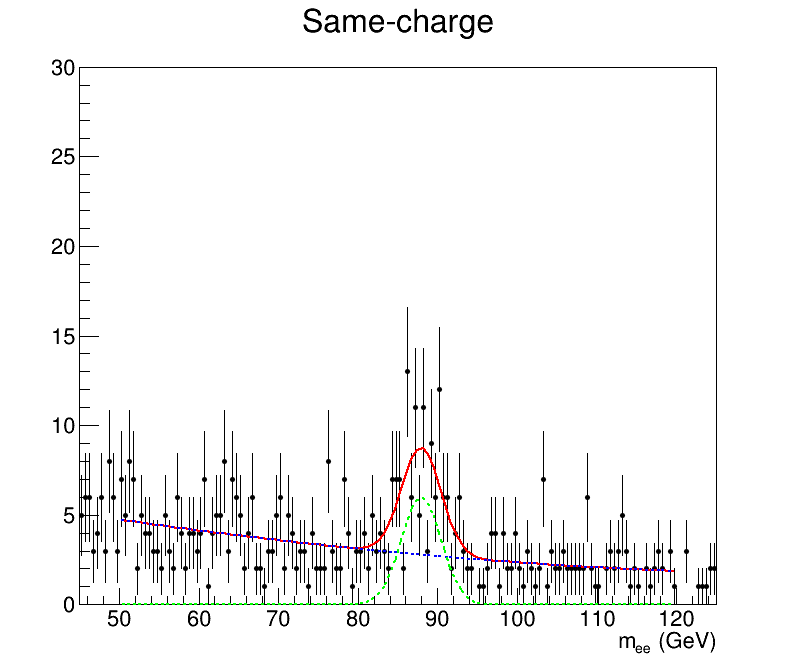

In [5]:
c.SetLogy(0)
hsslowstats.SetMarkerColor(1)
hsslowstats.SetLineColor(1)
hsslowstats.SetMarkerStyle(8)
hsslowstats.SetMarkerSize(0.5)
hsslowstats.GetYaxis().SetRangeUser(0,30)
hsslowstats.Draw("PE")

fsb = ROOT.TF1( 'fsb', '[0]*exp(-0.5*((x-[1])/[2])**2)+[3]+[4]*x+[5]*x*x',  50,120 )
fsb.SetParameter(1,91)
fsb.SetParameter(2,10)
fsb.SetParameter(3,5)
fsb.SetLineColor(2)
hsslowstats.Fit( fsb, 'LR' )

fb = ROOT.TF1( 'fb', '[0]+[1]*x+[2]*x*x',  50, 120 )
fb.SetParameter(0,fsb.GetParameter(3))
fb.SetParameter(1,fsb.GetParameter(4))
fb.SetParameter(2,fsb.GetParameter(5))
fb.SetLineColor(4)
fb.SetLineStyle(2)

fs = ROOT.TF1( 'fs', '[0]*exp(-0.5*((x-[1])/[2])**2)',  50,120 )
fs.SetParameter(0,fsb.GetParameter(0))
fs.SetParameter(1,fsb.GetParameter(1))
fs.SetParameter(2,fsb.GetParameter(2))
fs.SetLineColor( 3 )
fs.SetLineStyle(2)

fb.Draw('same')
fs.Draw('same')
c.Draw()
print('S+B ',fsb.Integral(80, 95))
print('S ',fs.Integral(80, 95))
print('B ',fb.Integral(80, 95))
print('NDF ',fsb.GetNDF())
print('Chi2 ',fsb.GetChisquare())
print('Chi2/NDF ',fsb.GetChisquare()/fsb.GetNDF(),'\n')

S+B  2126.155374442149
S  899.8581007739532
B  1226.2972736681963
NDF  134
Chi2  115.21690623603725
Chi2/NDF  0.8598276584778899 

 FCN=57.7381 FROM MIGRAD    STATUS=CONVERGED     686 CALLS         687 TOTAL
                     EDM=3.96961e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.26974e+02   5.24999e+00   2.17828e-02  -5.75456e-06
   2  p1           8.97182e+01   1.21342e-01   6.36780e-04  -2.20047e-04
   3  p2           2.93400e+00   1.28814e-01   4.90536e-04  -1.40111e-04
   4  p3           1.77468e+02   1.38279e+01   4.00013e-03   4.10272e-05
   5  p4          -8.50630e-01   3.32431e-01   4.21961e-05   4.61160e-03
   6  p5          -2.77328e-03   1.89336e-03   4.11744e-07   5.25398e-01
                               ERR DEF= 0.5


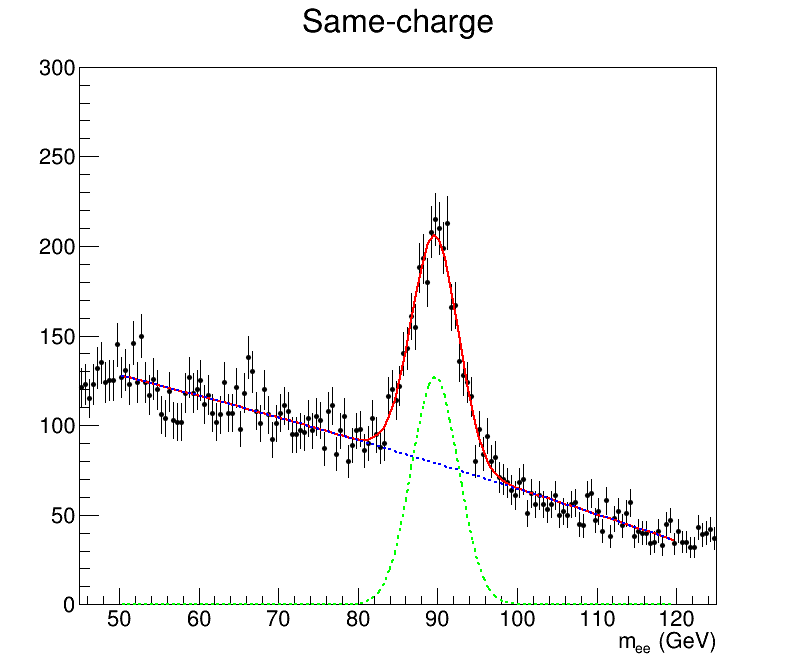

In [6]:
c.SetLogy(0)
hss.SetMarkerColor(1)
hss.SetLineColor(1)
hss.SetMarkerStyle(8)
hss.SetMarkerSize(0.5)
hss.GetYaxis().SetRangeUser(0,300)
hss.Draw("PE")

fsb = ROOT.TF1( 'fsb', '[0]*exp(-0.5*((x-[1])/[2])**2)+[3]+[4]*x+[5]*x*x',  50,120 )
fsb.SetParameter(1,91)
fsb.SetParameter(2,10)
fsb.SetParameter(3,100)
fsb.SetLineColor(2)
hss.Fit( fsb, 'LR' )

fb = ROOT.TF1( 'fb', '[0]+[1]*x+[2]*x*x',  50, 120 )
fb.SetParameter(0,fsb.GetParameter(3))
fb.SetParameter(1,fsb.GetParameter(4))
fb.SetParameter(2,fsb.GetParameter(5))
fb.SetLineColor(4)
fb.SetLineStyle(2)

fs = ROOT.TF1( 'fs', '[0]*exp(-0.5*((x-[1])/[2])**2)',  50,120 )
fs.SetParameter(0,fsb.GetParameter(0))
fs.SetParameter(1,fsb.GetParameter(1))
fs.SetParameter(2,fsb.GetParameter(2))
fs.SetLineColor( 3 )
fs.SetLineStyle(2)

fb.Draw('same')
fs.Draw('same')
c.Draw()

print('S+B ',fsb.Integral(80, 95))
print('S ',fs.Integral(80, 95))
print('B ',fb.Integral(80, 95))
print('NDF ',fsb.GetNDF())
print('Chi2 ',fsb.GetChisquare())
print('Chi2/NDF ',fsb.GetChisquare()/fsb.GetNDF(),'\n')

S+B  30961.141112971094
S  28333.25753309211
B  2627.8835798789846
NDF  269
Chi2  408.2100519267295
Chi2/NDF  1.5175094867164665 

 FCN=200.446 FROM MIGRAD    STATUS=CONVERGED    2389 CALLS        2390 TOTAL
                     EDM=3.10444e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.99656e+03   4.19330e+01  -6.00276e-02  -8.25471e-06
   2  p1           9.06850e+01   1.77424e-02   1.84769e-05  -7.90856e-03
   3  p2          -2.24320e+00   2.65422e-02   3.51392e-05   2.21568e-02
   4  p3           1.13262e+03   4.29530e+01   6.81846e-02  -2.90399e-05
   5  p4           8.91562e+01   5.80212e-02   1.07482e-04  -2.87630e-03
   6  p5          -4.95882e+00   8.04818e-02   1.27295e-04   6.45015e-03
   7  p6          -1.64010e+04   1.69747e+03  -1.92888e+00  -7.90436e-04
   8  p7           3.18700e+02   3.16975e+01

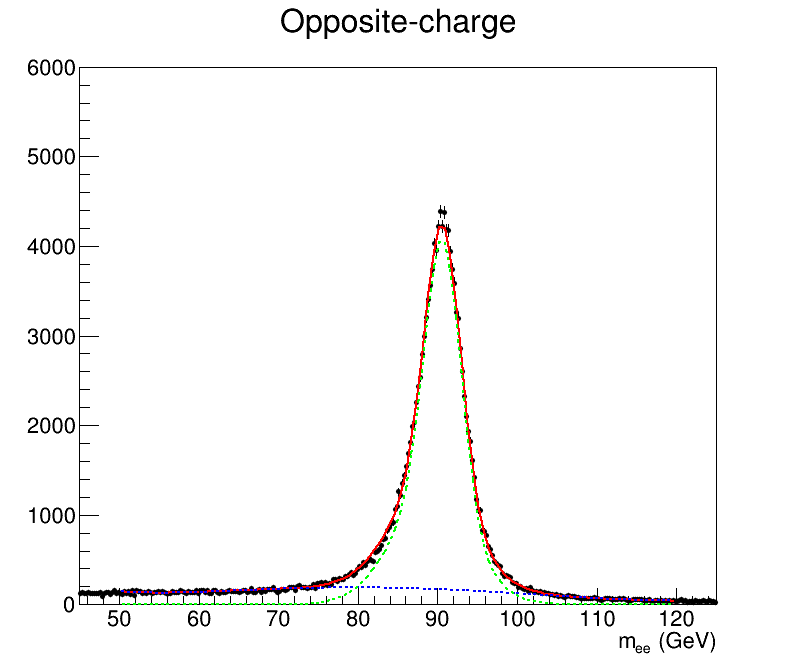

In [7]:
##### c.SetLogy(1)
hos.SetMarkerColor(1)
hos.SetLineColor(1)
hos.SetMarkerStyle(8)
hos.SetMarkerSize(0.5)
hos.GetYaxis().SetRangeUser(0,6000)
hos.Draw("PE")

fsb = ROOT.TF1( 'fsb', '[0]*exp(-0.5*((x-[1])/[2])**2)+[3]*exp(-0.5*((x-[4])/[5])**2)+[6]+[7]*x+[8]*x*x+[9]*x*x*x+[10]/x',  50,120 )
fsb.SetParameter(1,91)
fsb.SetParameter(2,10)
fsb.SetParameter(4,91)
fsb.SetParameter(5,10)
fsb.SetParameter(6,100)
fsb.SetLineColor( 2 )
hos.Fit( fsb, 'LR' )

fb = ROOT.TF1( 'fb', '[0]+[1]*x+[2]*x*x+[3]*x*x*x+[4]/x',  50, 120 )
fb.SetParameter(0,fsb.GetParameter(6))
fb.SetParameter(1,fsb.GetParameter(7))
fb.SetParameter(2,fsb.GetParameter(8))
fb.SetParameter(3,fsb.GetParameter(9))
fb.SetParameter(4,fsb.GetParameter(10))
fb.SetLineColor(4)
fb.SetLineStyle(2)

fs = ROOT.TF1( 'fs', '[0]*exp(-0.5*((x-[1])/[2])**2)+[3]*exp(-0.5*((x-[4])/[5])**2)',  50,120 )
fs.SetParameter(0,fsb.GetParameter(0))
fs.SetParameter(1,fsb.GetParameter(1))
fs.SetParameter(2,fsb.GetParameter(2))
fs.SetParameter(3,fsb.GetParameter(3))
fs.SetParameter(4,fsb.GetParameter(4))
fs.SetParameter(5,fsb.GetParameter(5))
fs.SetLineColor( 3 )
fs.SetLineStyle(2)

fb.Draw('same')
fs.Draw('same')
c.Draw()

print('S+B ',fsb.Integral(80, 95))
print('S ',fs.Integral(80, 95))
print('B ',fb.Integral(80, 95))
print('NDF ',fsb.GetNDF())
print('Chi2 ',fsb.GetChisquare())
print('Chi2/NDF ',fsb.GetChisquare()/fsb.GetNDF(),'\n')

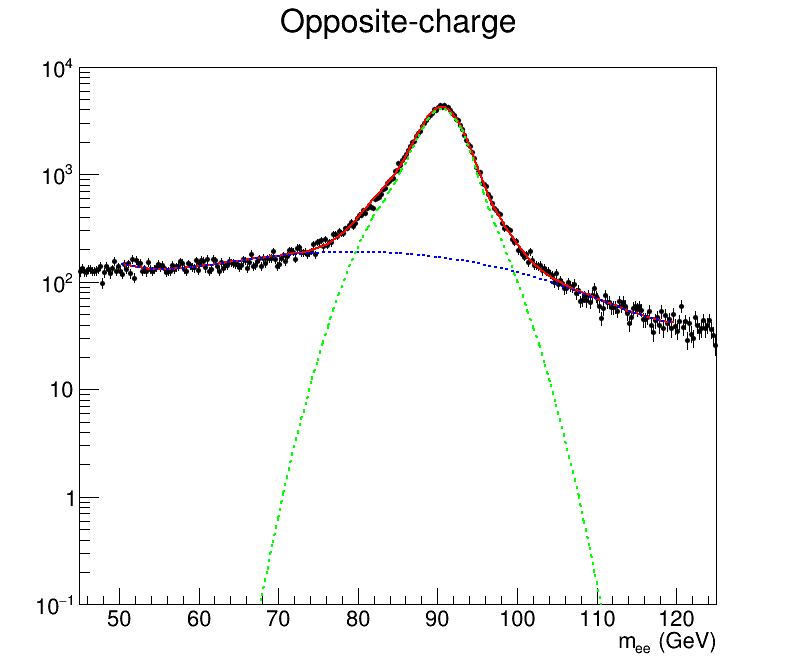

In [8]:
hos.GetYaxis().SetRangeUser(0.1,10000)
hos.Draw("PE")
fsb.Draw('same')
fb.Draw('same')
fs.Draw('same')
c.SetLogy(1)
c.Draw()